In [1]:
# pandas read transations.gz file 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# read transactions.gz file
df = pd.read_csv('transactions.gz', compression='gzip', header=0, sep=',', quotechar='"',  index_col=0)
df
#empty columns
df.drop(['merchantCity','merchantState','merchantZip','echoBuffer','posOnPremises','recurringAuthInd'],axis=1,inplace=True)


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var = ['merchantName','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch','isFraud']
for i in var:
    df[i] = le.fit_transform(df[i])
# converting in datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
# extractind year, month, day, hour, minute and seconds from datetime columns
df['transactionDateTime_year'] = df['transactionDateTime'].dt.year
df['transactionDateTime_month'] = df['transactionDateTime'].dt.month
df['transactionDateTime_day'] = df['transactionDateTime'].dt.day
df['transactionDateTime_hour'] = df['transactionDateTime'].dt.hour
df['transactionDateTime_minute'] = df['transactionDateTime'].dt.minute
df['transactionDateTime_second'] = df['transactionDateTime'].dt.second

df['currentExpDate_year'] = df['currentExpDate'].dt.year
df['currentExpDate_month'] = df['currentExpDate'].dt.month
df['currentExpDate_day'] = df['currentExpDate'].dt.day

df['accountOpenDate_year'] = df['accountOpenDate'].dt.year
df['accountOpenDate_month'] = df['accountOpenDate'].dt.month
df['accountOpenDate_day'] = df['accountOpenDate'].dt.day

df['dateOfLastAddressChange_year'] = df['dateOfLastAddressChange'].dt.year
df['dateOfLastAddressChange_month'] = df['dateOfLastAddressChange'].dt.month
df['dateOfLastAddressChange_day'] = df['dateOfLastAddressChange'].dt.day
# drop datetime column
df.drop('transactionDateTime',axis = 1,inplace = True)
df.drop('currentExpDate',axis = 1,inplace = True)
df.drop('accountOpenDate',axis = 1,inplace = True)
df.drop('dateOfLastAddressChange',axis = 1,inplace = True)


In [3]:
#check if nan in df 
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionAmount                0
merchantName                     0
acqCountry                       0
merchantCountryCode              0
posEntryMode                     0
posConditionCode                 0
merchantCategoryCode             0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                  0
currentBalance                   0
cardPresent                      0
expirationDateKeyInMatch         0
isFraud                          0
transactionDateTime_year         0
transactionDateTime_month        0
transactionDateTime_day          0
transactionDateTime_hour         0
transactionDateTime_minute       0
transactionDateTime_second       0
currentExpDate_year              0
currentExpDate_month             0
currentExpDate_day               0
accountOpenDate_year

In [4]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,737265056,737265056,5000,5000.00,98.55,2086,3,3,0,0,...,32,2023,6,1,2015,3,14,2015,3,14
1,737265056,737265056,5000,5000.00,74.51,27,3,3,2,0,...,54,2024,2,1,2015,3,14,2015,3,14
2,737265056,737265056,5000,5000.00,7.47,1305,3,3,2,0,...,39,2025,8,1,2015,3,14,2015,3,14
3,737265056,737265056,5000,5000.00,7.47,1305,3,3,2,0,...,50,2025,8,1,2015,3,14,2015,3,14
4,830329091,830329091,5000,5000.00,71.18,2084,3,3,0,0,...,46,2029,10,1,2015,8,6,2015,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,119.92,1061,3,3,4,0,...,12,2022,12,1,2012,8,23,2012,8,23
786359,732852505,732852505,50000,48785.04,18.89,2479,3,3,2,0,...,34,2023,8,1,2012,8,23,2012,8,23
786360,732852505,732852505,50000,48766.15,49.43,1061,3,3,0,0,...,24,2025,8,1,2012,8,23,2012,8,23
786361,732852505,732852505,50000,48716.72,49.89,2487,3,3,2,2,...,55,2022,7,1,2012,8,23,2012,8,23


In [5]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


# from sklearn.preprocessing import StandardScaler
# target = "isFraud"

# features = list(train_set.columns)
# features = [x for x in features if x not in ["Date", 'expirationDateKeyInMatch', "isFraud"]]
# # Separating out the features
# x = df.loc[:, features].values
# # Separating out the target
# y = df.loc[:,["isFraud"]].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)
# New_df is from the random undersample data (fewer instances)
target = df["isFraud"]
a = target.value_counts()
print(a)


0    773946
1     12417
Name: isFraud, dtype: int64


In [6]:
features = list(df.columns)
features = [x for x in features if x not in ["IsFraud"]]
features = df[features]
print(features)



        accountNumber  customerId  creditLimit  availableMoney  \
0           737265056   737265056         5000         5000.00   
1           737265056   737265056         5000         5000.00   
2           737265056   737265056         5000         5000.00   
3           737265056   737265056         5000         5000.00   
4           830329091   830329091         5000         5000.00   
...               ...         ...          ...             ...   
786358      732852505   732852505        50000        48904.96   
786359      732852505   732852505        50000        48785.04   
786360      732852505   732852505        50000        48766.15   
786361      732852505   732852505        50000        48716.72   
786362      732852505   732852505        50000        48666.83   

        transactionAmount  merchantName  acqCountry  merchantCountryCode  \
0                   98.55          2086           3                    3   
1                   74.51            27           3    

In [7]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re

def check_data_balance(series, style="seaborn-pastel"):
  with plt.style.context(style):
    unique = series.value_counts()
    display(unique) #show unique value counts of the target
    plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced



0    773946
1     12417
Name: isFraud, dtype: int64

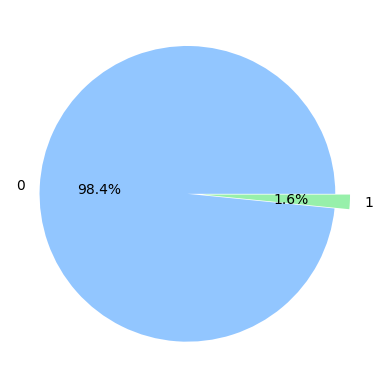

In [9]:
check_data_balance(df["isFraud"])


In [10]:
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


X_train.shape: (550454, 34)
X_test.shape: (235909, 34)
y_train.shape: (550454,)
y_test.shape: (235909,)


In [11]:
display(X_train)
display(y_train)


,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
542814,553545372,553545372,1000,1000.00,261.93,600,3,3,2,0,...,23,2030,11,1,2014,11,11,2014,11,11
289267,727249604,727249604,500,219.68,149.54,2475,3,3,0,0,...,25,2033,1,1,2013,5,9,2013,5,9
632418,552347406,552347406,15000,8710.86,75.54,2485,3,3,2,1,...,35,2027,8,1,2007,6,1,2016,12,3
20397,617540437,617540437,250,131.63,14.27,945,3,3,1,1,...,10,2028,6,1,2014,6,6,2014,6,6
423361,292929211,292929211,2500,585.94,37.57,584,3,3,1,0,...,29,2029,8,1,2010,3,20,2016,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,380680241,380680241,5000,459.81,42.53,1130,3,3,2,0,...,56,2029,1,1,2014,6,21,2016,7,20
365838,832842201,832842201,15000,2323.78,16.15,1524,3,3,0,0,...,54,2025,11,1,2015,2,21,2016,11,12
131932,849113447,849113447,20000,11617.07,27.48,358,3,3,2,0,...,22,2028,2,1,2015,2,25,2016,5,26
671155,782081187,782081187,15000,1857.51,126.96,1198,3,3,0,1,...,24,2031,4,1,2014,1,15,2016,5,6


542814    0
289267    0
632418    0
20397     0
423361    0
         ..
259178    0
365838    0
131932    0
671155    0
121958    0
Name: isFraud, Length: 550454, dtype: int64

In [12]:
check_data_balance(y_train)


0    541709
1      8745
Name: isFraud, dtype: int64

In [13]:
check_data_balance(y_test)


0    232237
1      3672
Name: isFraud, dtype: int64

In [14]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

# X_train_fit = num_pipeline.fit(X_train)
# X_test_fit = num_pipeline.fit(X_test)
# X_train_scaled = X_train_fit.transform(X_train)
# X_test_scaled = X_test_fit.transform(X_test)
#################################################################
#################################################################
num_pipeline.fit(X_train, y_train)
# Only fit, you are not adding anything to the pipeline.
#################################################################
X_train_transformed  = num_pipeline.transform(X_train)    # X_train_scaled
X_test_transformed  = num_pipeline.transform(X_test)      # X_test_scaled 

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")


X_train_transformed.shape: (550454, 34)
X_test_transformed.shape: (235909, 34)


In [16]:
print(num_pipeline["std_scaler"].n_features_in_)
print(num_pipeline["std_scaler"].mean_)
print(num_pipeline["std_scaler"].var_)
print(num_pipeline["std_scaler"].scale_)
print(num_pipeline["std_scaler"].n_samples_seen_)



34
[5.37264890e+08 5.37264890e+08 1.07527187e+04 6.24547189e+03
 1.36893910e+02 1.42864267e+03 2.98677274e+00 2.98176414e+00
 1.18578482e+00 2.11263793e-01 9.60849771e+00 5.44444925e+02
 5.44190039e+02 4.75601269e+03 1.00214369e+00 4.50724677e+03
 4.49932238e-01 1.27531093e-03 1.58868861e-02 2.01600000e+03
 6.64663351e+00 1.57241277e+01 1.15033191e+01 2.94957272e+01
 2.95136215e+01 2.02628686e+03 6.44425147e+00 1.00000000e+00
 2.01354742e+03 7.04608196e+00 1.59167941e+01 2.01480532e+03
 6.28556065e+00 1.54789774e+01]
[6.52858236e+16 6.52858236e+16 1.35141528e+08 7.86712814e+07
 2.18220515e+04 8.11436602e+05 5.09809944e-02 4.61490851e-02
 8.99658335e-01 1.88820360e-01 2.84053085e+01 6.83779693e+04
 6.83942863e+04 8.99083408e+06 5.50299761e-02 4.16860745e+07
 2.47493219e-01 1.27368451e-03 1.56344929e-02 0.00000000e+00
 1.17986280e+01 7.71553344e+01 4.79037330e+01 3.00005987e+02
 2.99605263e+02 1.56676237e+01 1.18825892e+01 0.00000000e+00
 3.49514307e+00 1.14048496e+01 7.66390181e+01 3.52

In [17]:
print(X_train_transformed.mean(axis=0))
print(X_test_transformed.mean(axis=0))

[-1.94063437e-16 -1.94063437e-16  1.29341202e-17  3.07708142e-16
  2.93018492e-16 -2.28476974e-17 -9.77933082e-16  9.67993688e-16
  8.27615886e-17  7.01049969e-17  6.17016913e-18  7.26995660e-17
  1.84085318e-16 -7.16281768e-17  1.66129868e-17 -3.83763866e-16
 -4.65989760e-18  9.71995262e-18  8.62274681e-18  0.00000000e+00
  7.20347883e-17  2.70041712e-17 -2.39061783e-17  5.93459259e-18
  9.12358899e-17  1.64803927e-14 -6.82720178e-17  0.00000000e+00
 -9.35038789e-15 -8.82411635e-17  1.61353795e-18 -4.67733027e-14
 -6.72522618e-17 -1.94528135e-17]
[-4.21253928e-04 -4.21253928e-04  1.93427044e-03  1.97431842e-03
  2.07327127e-03  2.37355611e-03 -2.00071130e-03 -1.16414420e-03
 -1.66750899e-04 -1.98057677e-03  4.57714323e-03  2.85695782e-04
 -7.88066668e-05  1.56203220e-03 -2.81374762e-03  7.70449761e-04
 -8.02702052e-03  4.76794093e-03 -2.57171634e-03  0.00000000e+00
  1.65900474e-03  3.29254868e-03  3.85935492e-03  4.41753278e-03
 -5.18426717e-04 -4.01581218e-03  2.14592796e-03  0.0000

In [ ]:
# from sklearn.model_selection import cross_val_score


# for key, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     training_score = cross_val_score(classifier, X_train, y_train, cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1, random_state=10086)
model.fit(X_train_transformed, y_train)


LogisticRegression(n_jobs=-1, random_state=10086)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_transformed)
y_pred_proba = model.predict_proba(X_test_transformed) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()

print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")
print(f"precision_score: {precision_score(y_test, y_pred)}")
print(f"recall_score: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba[:,1])}")


accuracy_score: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
roc_auc_score: 1.0
